# Handin 3
   ### Andreas Malthe Henriksen ( 202004107 )

You've built a drone, but it has a problem overheating. Temperature measurements were taken.

<table>
    <tr>
        <td>Time (minutes)</td>
        <td>2</td>
        <td>5</td>
        <td>8</td>
        <td>10</td>
        <td>11</td>
    </tr>
    <tr>
        <td>Temperature (celcius)</td>
        <td>35</td>
        <td>40</td>
        <td>50</td>
        <td>65</td>
        <td>70</td>
    </tr>
</table>

#### (a) Plot the observed data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
time = np.array([2,5,8,10,11])
temp = np.array([35,40,50,65,70])

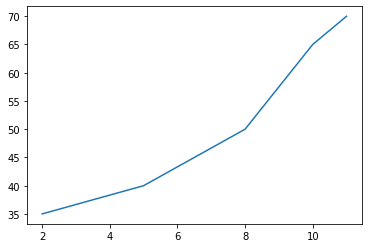

In [3]:
fig, ax = plt.subplots()

ax.plot(time,temp)

We want a good estimate as to when the temperature exceeds 55 degrees. Consider the polynomial $p(x)=a+bx+cx²$. 
#### (b) Set up a linear system of equations, such that p intersects the points given in the table above.

$$a+8b+64c=50$$
$$a+10b+100c=65$$
$$a+11b+121c=70$$

Will be set up using the np.arrays, like so

In [4]:
m = np.array([
    [1., 8.,  64.,  50.],
    [1., 10., 100,  65.],
    [1., 11., 121., 70.]
])

print(m, "\n\n r1 <= r1 - r0")
m[1,:] -= m[0,:]
print(m, "\n\n r2 <= r2 - r0")
m[2,:] -= m[0,:]
print(m, "\n\n r1 <= r1 * 0.5")
m[1,:] = m[1,:] * 0.5 
print(m, "\n\n r2 <= r2 - 3 * r1")
m[2,:] -= 3* m[1,:] 
print(m, "\n\n r2 <= (1/3) * r2")
m[2,:] = (1/3.) * m[2,:] 
print(m, "\n\n r1 <= r1 - 18 * r2")
m[1,:] -= 18 * m[2,:]
print(m, "\n\n r0 <= r0 - 64 * r2")
m[0,:] -= 64 * m[2,:]
print(m, "\n\n r0 <= r0 - 8 * r1")
m[0,:] -= 8 * m[1,:] 
print(m, "\n\n")

[[  1.   8.  64.  50.]
 [  1.  10. 100.  65.]
 [  1.  11. 121.  70.]] 

 r1 <= r1 - r0
[[  1.   8.  64.  50.]
 [  0.   2.  36.  15.]
 [  1.  11. 121.  70.]] 

 r2 <= r2 - r0
[[ 1.  8. 64. 50.]
 [ 0.  2. 36. 15.]
 [ 0.  3. 57. 20.]] 

 r1 <= r1 * 0.5
[[ 1.   8.  64.  50. ]
 [ 0.   1.  18.   7.5]
 [ 0.   3.  57.  20. ]] 

 r2 <= r2 - 3 * r1
[[ 1.   8.  64.  50. ]
 [ 0.   1.  18.   7.5]
 [ 0.   0.   3.  -2.5]] 

 r2 <= (1/3) * r2
[[ 1.          8.         64.         50.        ]
 [ 0.          1.         18.          7.5       ]
 [ 0.          0.          1.         -0.83333333]] 

 r1 <= r1 - 18 * r2
[[ 1.          8.         64.         50.        ]
 [ 0.          1.          0.         22.5       ]
 [ 0.          0.          1.         -0.83333333]] 

 r0 <= r0 - 64 * r2
[[  1.           8.           0.         103.33333333]
 [  0.           1.           0.          22.5       ]
 [  0.           0.           1.          -0.83333333]] 

 r0 <= r0 - 8 * r1
[[  1.           0.           

And we can read out the results
$$a=-76.667$$
$$b=22.5$$
$$c=-0.833$$

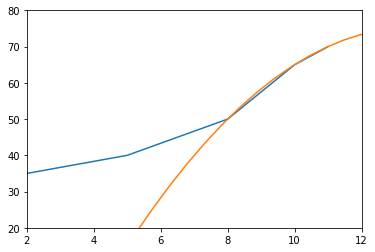

In [5]:
fig, ax = plt.subplots()
plt.xlim(2.,12.)
plt.ylim(20.,80.)

lin = np.linspace(0.,12.,24)
def p0(x):
    return -76.667 + 22.5 * x -0.833 * x**2

ax.plot(time,temp)
ax.plot(lin, p0(lin))

#### (c) Suppose we wanted a polynomium $p(x)$ that intersects all points, what is the minimal degree possible for $p(x)$? Plot the result.

To solve this, I will use, as adviced, the linalg.solve function.

In [6]:
# a + bx + cx² + dx³ + ex⁴
p1 = np.array([1.,2., 4.,8.,    16.])
p2 = np.array([1.,5., 25., 125.,  625.])
p3 = np.array([1.,8., 64., 512.,  4096.])
p4 = np.array([1.,10.,100.,1000., 10000.])
p5 = np.array([1.,11.,121.,1331., 14641.])

ps = np.array([p1,p2,p3,p4,p5])
r = np.array([35.,40.,50.,65.,70.]) # y-vals

solve = np.linalg.solve(ps,r)

print(solve)

[-1.97530864 32.85493827 -9.09722222  1.03395062 -0.03858025]


The resulting polynomial will be 
$$p(x)=-1.97530864 + 32.85493827x - 9.09722222x^2 +  1.03395062x^3 - 0.03858025x^4$$

Then the result is plotted.

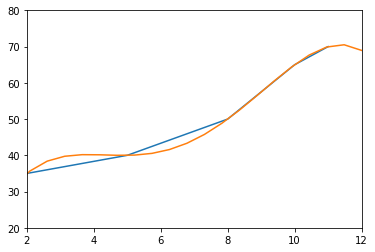

In [7]:
fig, ax = plt.subplots()
plt.xlim(2.,12.)
plt.ylim(20.,80.)

lin = np.linspace(0.,12.,24)
def p(x):
    return (-1.97530864 + 
            32.85493827 * x -
            9.09722222  * x**2 +
            1.03395062  * x**3 -
            0.03858025  * x**4 )

ax.plot(time,temp)
ax.plot(lin, p(lin))

To argue that the 4-degree polynomial above is the lowest degree solution I will set up a system of equations and solve it to reveal a contradiction.

I will do this in the following python snippet.


In [8]:
np.set_printoptions(suppress=True)
# a + bx + cx² + dx³
p1 = np.array([1.0,2.0, 4.0,8.0, 35.0])
p2 = np.array([1.0,5.0, 25.0, 125.0, 40.0])
p3 = np.array([1.0,8.0, 64.0, 512.0, 50.0])
p4 = np.array([1.0,10.0,100.0,1000.0, 65.0])
p5 = np.array([1.0,11.0,121.0,1331.0, 70.0])

ps = np.array([p1,p2,p3,p4,p5])
print(ps, "\n\n")

ps[1,:] += -ps[0,:]
print("r1 <= r1 - r0");print(ps,"\n\n")

ps[2,:] += -ps[0,:]
print("r2 <= r2 - r0");print(ps,"\n\n")

ps[3,:] += -ps[0,:]
print("r3 <= r3 - r0");print(ps,"\n\n")

ps[4,:] += -ps[0,:]
print("r4 <= r4 - r0");print(ps,"\n\n")

ps[1,:] = 1/3 * ps[1,:]
print("r1 <= 1/3 r1");print(np.around(ps,2),"\n\n")

ps[2,:] += -6*ps[1,:]
print("r2 <= r2 - 6r1");print(np.around(ps,2),"\n\n")

ps[3,:] += -8*ps[1,:]
print("r3 <= r3 - 8r1");print(np.around(ps,2),"\n\n")

ps[4,:] += -9*ps[1,:]
print("r4 <= r4 - 9r1");print(np.around(ps,2),"\n\n")

ps[2,:] = 1/18 * ps[2,:]
print("r2 <= 1/18 r2");print(np.around(ps,2),"\n\n")

ps[3,:] += -40*ps[2,:]
print("r3 <= r3 - 40r2");print(np.around(ps,2),"\n\n")

ps[4,:] += -54*ps[2,:]
print("r4 <= r4 - 54r2");print(np.around(ps,2),"\n\n")

ps[3,:] = 1/80*ps[3,:]
print("r3 <= 1/80 r3 ");print(np.around(ps,2),"\n\n")

ps[4,:] += -162*ps[3,:]
print("r4 <= r4 - 162r3");print(np.around(ps,2),"\n\n")

[[   1.    2.    4.    8.   35.]
 [   1.    5.   25.  125.   40.]
 [   1.    8.   64.  512.   50.]
 [   1.   10.  100. 1000.   65.]
 [   1.   11.  121. 1331.   70.]] 


r1 <= r1 - r0
[[   1.    2.    4.    8.   35.]
 [   0.    3.   21.  117.    5.]
 [   1.    8.   64.  512.   50.]
 [   1.   10.  100. 1000.   65.]
 [   1.   11.  121. 1331.   70.]] 


r2 <= r2 - r0
[[   1.    2.    4.    8.   35.]
 [   0.    3.   21.  117.    5.]
 [   0.    6.   60.  504.   15.]
 [   1.   10.  100. 1000.   65.]
 [   1.   11.  121. 1331.   70.]] 


r3 <= r3 - r0
[[   1.    2.    4.    8.   35.]
 [   0.    3.   21.  117.    5.]
 [   0.    6.   60.  504.   15.]
 [   0.    8.   96.  992.   30.]
 [   1.   11.  121. 1331.   70.]] 


r4 <= r4 - r0
[[   1.    2.    4.    8.   35.]
 [   0.    3.   21.  117.    5.]
 [   0.    6.   60.  504.   15.]
 [   0.    8.   96.  992.   30.]
 [   0.    9.  117. 1323.   35.]] 


r1 <= 1/3 r1
[[   1.      2.      4.      8.     35.  ]
 [   0.      1.      7.     39.      1.67]


At this point we stop, because the last line of the matrix, when unpacked says

$$0=-6.25$$

Which is a contradiction. Therefore no solution to a third degree polynomial can be found.

Another approach is to make multiple polynomials to represent different intervals of the graph.

#### (d) Set up a system of linear equations for the function $f$

$$f(x) = \begin{cases} p_1(x) & \text{for } 5.0\leq x \leq 8.0 \\
                      p_2(x)  & \text{for } 8.0\leq x \leq 10.0
        \end{cases}$$
Where $p_1(x)$ intersects the points at 5 and 8, and where $p_2(x)$ intersects the points at 8 and 10. At $x=8$, the functions $p_1(x)$ and $p_2(x)$ should have the same slope, i.e $p_1'(8)=p_2'(8)$

First we find the functions $p_1(x)$ and $p_2(x)$

Let $$p_1(x)=a+bx+cx^2$$
Let $$p_2(x)=m+nx+lx^2$$

$$a+5b+25c=40$$
$$a+8b+64c=50$$
$$m+8n+64l=50$$
$$m + 10n+ 100l= 65$$


$$p_1'(8)=p_2'(8)$$
$$\implies$$
$$16c+b =16l+n$$
$$\implies$$
$$16c+b - (16l+n) = 0$$
$$\implies$$
$$16c+b - 16l-n = 0$$

$$
\begin{bmatrix}
    1 & 5 & 25 & 0 & 0 & 0\\
    1 & 8 & 64 & 0 & 0 & 0\\
    0 & 0 & 0 & 1 & 8 & 64\\
    0 & 0 & 0 & 1 & 10 & 100\\
    0 & 1 & 16 & 0 & -1 & -16\\
    0 & 0 & 0 & 0 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
    a\\b\\c\\m\\n\\l
\end{bmatrix}=
\begin{bmatrix}40\\50\\50\\60\\0\\0\end{bmatrix}
$$


In [9]:
p1 = np.array([1,5,25,0,0,0.,40])
p2 = np.array([1,8,64,0,0,0.,50])
p3 = np.array([0,0,0,1,8,64.,50])
p4 = np.array([0,0,0,1,10,100.,60])
p5 = np.array([0,1,16,0,-1,-16.,0])
p6 = np.array([0,0,0,0,0,0.,0])

ps = np.array([p1,p2,p3,p4,p5,p6])

print("Represented in python\n", ps)

temp = np.copy(ps[2,:])
ps[2,:] = ps[2,:]=ps[4,:]
ps[4,:] = temp
print("\n\n Swap r2 & r4\n",ps)
ps[1,:] -=ps[0,:]
print("\n\n r1 <= r1 - r0 \n",ps)
ps[1,:] = 1/3 * ps[1,:]
print("\n\n r1 <= r1 * 1/3 \n",np.around(ps,2))
ps[2,:] -= ps[1,:]
print("\n\n r2 <= r2 - r1 \n",np.around(ps,2))
ps[2,:] = 1/3*ps[2,:]
print("\n\n r2 <= r2 *1/3 \n",np.around(ps,2))
ps[4,:] -= ps[3,:]
print("\n\n r4 <= r4 - r3 \n",np.around(ps,2))
ps[4,:] = -1/2 * ps[4,:]
print("\n\n r4 <= r4 * 1/2 \n",np.around(ps,2))

Represented in python
 [[  1.   5.  25.   0.   0.   0.  40.]
 [  1.   8.  64.   0.   0.   0.  50.]
 [  0.   0.   0.   1.   8.  64.  50.]
 [  0.   0.   0.   1.  10. 100.  60.]
 [  0.   1.  16.   0.  -1. -16.   0.]
 [  0.   0.   0.   0.   0.   0.   0.]]


 Swap r2 & r4
 [[  1.   5.  25.   0.   0.   0.  40.]
 [  1.   8.  64.   0.   0.   0.  50.]
 [  0.   1.  16.   0.  -1. -16.   0.]
 [  0.   0.   0.   1.  10. 100.  60.]
 [  0.   0.   0.   1.   8.  64.  50.]
 [  0.   0.   0.   0.   0.   0.   0.]]


 r1 <= r1 - r0 
 [[  1.   5.  25.   0.   0.   0.  40.]
 [  0.   3.  39.   0.   0.   0.  10.]
 [  0.   1.  16.   0.  -1. -16.   0.]
 [  0.   0.   0.   1.  10. 100.  60.]
 [  0.   0.   0.   1.   8.  64.  50.]
 [  0.   0.   0.   0.   0.   0.   0.]]


 r1 <= r1 * 1/3 
 [[  1.     5.    25.     0.     0.     0.    40.  ]
 [  0.     1.    13.     0.     0.     0.     3.33]
 [  0.     1.    16.     0.    -1.   -16.     0.  ]
 [  0.     0.     0.     1.    10.   100.    60.  ]
 [  0.     0.     0.     1

#### (e) Show that there are multiple solutions
As can be observed, the pivot number of pivot elements are one less than the variables, as such there are multiple solutions. And no contradictory results occur, as in (c)

#### (f) Adding a condition on $p_1'(5)$ can give a unique solution. Add a conditions, and find a unique solution, argue for your choice of constraint. Plot the result

The condition that I add is $p_1'(5)=1.875$ because that is the slope at $x=5$ derived from the 3rd-degree polynomial $$f(x)\approx28.89 +  4.31x - 0.76 x^2 + 0.069 x^3$$
which is derived from solving the system of equations that includes the first 4 observations

$$a+5b+25c=40$$
$$a+8b+64c=50$$
$$m+8n+64l=50$$
$$m + 10n+ 100l= 65$$
$$16c+b - 16l-n = 0$$
$$10c+b = 1.875$$
$$\begin{bmatrix}
    1 & 5 & 25 & 0 & 0 & 0\\
    1 & 8 & 64 & 0 & 0 & 0\\
    0 & 0 & 0 & 1 & 8 & 64\\
    0 & 0 & 0 & 1 & 10 & 100\\
    0 & 1 & 16 & 0 & -1 & -16\\
    0 & 1 & 10 & 0 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
    a\\b\\c\\m\\n\\l
\end{bmatrix}=
\begin{bmatrix}40\\50\\50\\65\\0\\1.875\end{bmatrix}
$$

This system is solved using np.linalg.solve


In [10]:
p1 = np.array([1,5,25,0,0,0.])
p2 = np.array([1,8,64,0,0,0.])
p3 = np.array([0,0,0,1,8,64.])
p4 = np.array([0,0,0,1,10,100.])
p5 = np.array([0,1,16,0,-1,-16.])
p6 = np.array([0,1,10,0,0,0.])

ps = np.array([p1,p2,p3,p4,p5,p6])

res = np.array([40,50,50,65,0,1.875])

solved = np.linalg.solve(ps,res)
print(solved)

[ 42.77777778  -2.98611111   0.48611111  98.33333333 -16.875
   1.35416667]


Resulting in 

$$a=42.778$$
$$b=-2.986$$
$$c=0.486$$
$$m=98.333$$
$$n=-16.875$$
$$l=1.354$$

Now we define the functions as

In [11]:
def p1(x):
    return solved[0] + solved[1] * x + solved[2] * x**2 

def p2(x):
    return solved[3] + solved[4] * x + solved[5] * x**2

def f(x):
    if (x <= 8):
        return p1(x)
    else:
        return p2(x)

And then we will plot the result

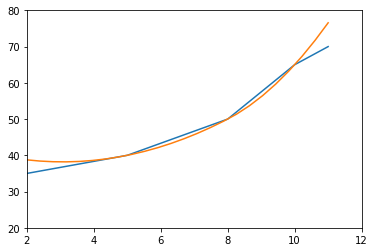

In [12]:
fig, ax = plt.subplots()
plt.xlim(2.,12.)
plt.ylim(20.,80.)

# Our observations
time = np.array([2,5,8,10,11])
temp = np.array([35,40,50,65,70])

# Our prediction
lin = np.linspace(2.,11.,24)
i = 0
pred = np.array(lin)
for x in lin:
    pred[i] = f(x) # Overwrite the entry with a function value.
    i+=1

# Plot the result
ax.plot(time, temp)
ax.plot(lin, pred)

#### (g) Which prediction would you rather use for estimating when the temperature exceeds 55 degrees?

I plot the estimators on a graph along with the data points

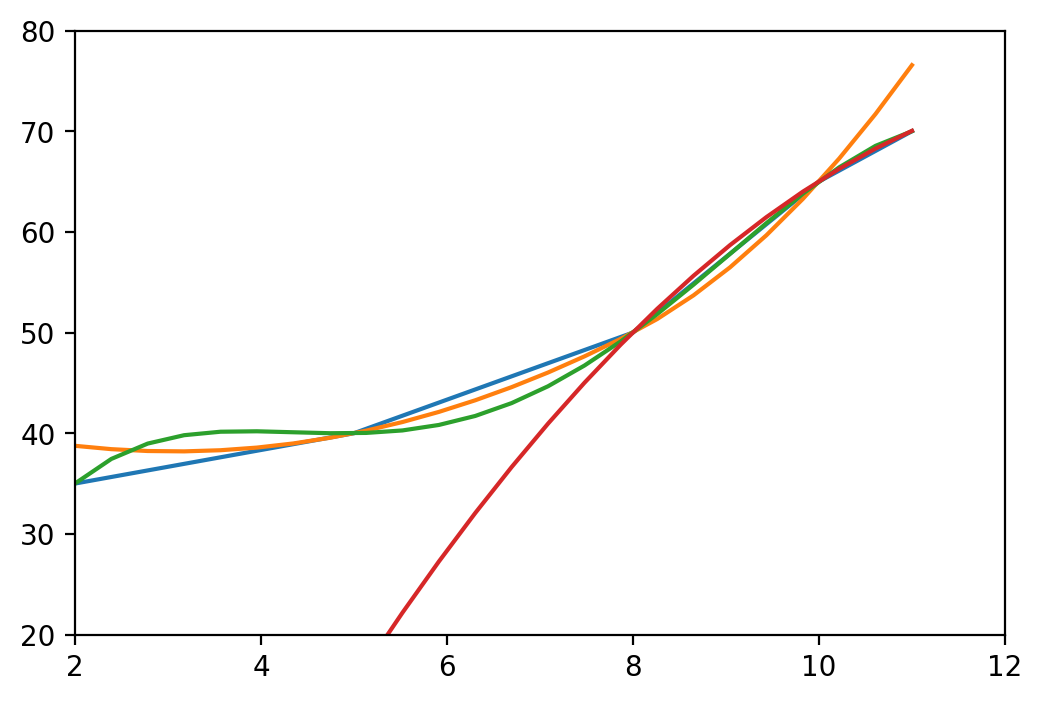

In [13]:
fig, ax = plt.subplots(dpi=200)
plt.xlim(2.,12.)
plt.ylim(20.,80.)

# Plot the result
ax.plot(time, temp)
ax.plot(lin, pred)
ax.plot(lin, p(lin))
ax.plot(lin, p0(lin))

If we look at the space between $x=8$ and $x=10$ one can see that the quadratic polynomial follows the linear line most closely and also keeps to the trend in the end

I would use this for estimating when the temperature exceeds 55 degrees.